In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('tweet_emotions.csv')
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


<h2>PRA PENGOLAHAN DATA</h2>

In [3]:
# IMPORT LIBRARY
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
import string 

# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to /home/aldi/nltk_data...
[nltk_data] Error downloading 'punkt' from
[nltk_data]     <https://raw.githubusercontent.com/nltk/nltk_data/gh-
[nltk_data]     pages/packages/tokenizers/punkt.zip>:   <urlopen error
[nltk_data]     [Errno 104] Connection reset by peer>
[nltk_data] Downloading package stopwords to /home/aldi/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/aldi/nltk_data...


In [4]:
df.shape

(40000, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [6]:
df.describe()

,tweet_id
count,4.000000e+04
mean,1.845184e+09
std,1.188579e+08
min,1.693956e+09
25%,1.751431e+09
50%,1.855443e+09
75%,1.962781e+09
max,1.966441e+09


Case Folding

In [7]:
import re
def remove_pattern(text,pattern):
    
    # re.findall() untuk menemukan @something dan memasukkannya ke dalam daftar untuk proses lebih lanjut
    r = re.findall(pattern,text)
    
    # re.sub() untuk menghapus @something dari kalimat di dataset
    for i in r:
        text = re.sub(i,"",text)
    
    return text

In [8]:
df['content'] = np.vectorize(remove_pattern)(df['content'], "@[\w]*")
df

,tweet_id,sentiment,content
0,1956967341,empty,i know i was listenin to bad habit earlier a...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,We want to trade with someone who has Houston...
...,...,...,...
39995,1753918954,neutral,
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP OUT MY ...


In [9]:
#Mengubah semua huruf menjadi huruf kecil (lowercase) semua.

df["content"] = df["content"].apply(lambda x: x.lower())
df

,tweet_id,sentiment,content
0,1956967341,empty,i know i was listenin to bad habit earlier a...
1,1956967666,sadness,layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends soon!
4,1956968416,neutral,we want to trade with someone who has houston...
...,...,...,...
39995,1753918954,neutral,
39996,1753919001,love,happy mothers day all my love
39997,1753919005,love,happy mother's day to all the mommies out ther...
39998,1753919043,happiness,wassup beautiful!!! follow me!! peep out my ...


In [10]:
# Menghapus Tanda Baca, Angka, dan Karakter Khusus
df["content"] = df["content"].str.replace("[^a-zA-Z#]", " ")
df

/tmp/ipykernel_3850/3466370851.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["content"] = df["content"].str.replace("[^a-zA-Z#]", " ")


,tweet_id,sentiment,content
0,1956967341,empty,i know i was listenin to bad habit earlier a...
1,1956967666,sadness,layin n bed with a headache ughhhh waitin o...
2,1956967696,sadness,funeral ceremony gloomy friday
3,1956967789,enthusiasm,wants to hang out with friends soon
4,1956968416,neutral,we want to trade with someone who has houston...
...,...,...,...
39995,1753918954,neutral,
39996,1753919001,love,happy mothers day all my love
39997,1753919005,love,happy mother s day to all the mommies out ther...
39998,1753919043,happiness,wassup beautiful follow me peep out my ...


Tokenizing

In [13]:
tokenized_tweet = df['content'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [i, know, i, was, listenin, to, bad, habit, ea...
1    [layin, n, bed, with, a, headache, ughhhh, wai...
2                  [funeral, ceremony, gloomy, friday]
3          [wants, to, hang, out, with, friends, soon]
4    [we, want, to, trade, with, someone, who, has,...
Name: content, dtype: object

Filtering


In [14]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

print(stop_words)

{'don', 'are', 'been', 'itself', 'or', 'by', 'not', "should've", 'didn', 'then', 'these', 'mightn', 'doesn', 'yourself', 'who', 'the', 'so', "don't", 'am', 'he', 'hadn', "you've", "haven't", 'hasn', 'herself', 'off', "you'll", "couldn't", 'did', 'up', 'such', 'an', 'they', 'will', 'how', 'most', 'just', 'it', 'ma', 'in', 'having', 'this', 'until', 'their', 'during', "isn't", 'all', "mustn't", 'only', 'into', 'your', 'with', "hasn't", 'no', 'as', 'before', 'yourselves', 'too', 'should', 'above', 'him', "that'll", 'has', 'mustn', 'other', 'over', 'had', 'a', "you'd", 'under', "aren't", 'needn', 'again', "needn't", 'for', 'against', 'weren', 'himself', 'nor', 'do', "she's", 'myself', 'be', 'y', 's', 'than', 'same', 'own', 'theirs', "you're", 'after', "hadn't", 'further', 'that', 'out', 'because', 're', 'i', 'which', 'won', 'shouldn', "wouldn't", 'ourselves', "shouldn't", 'yours', 'here', 'ours', 'm', "weren't", 'wasn', 'ain', 'have', 'about', 'some', 't', 'between', 'his', "wasn't", 'now'

Stemming

In [15]:
from nltk import PorterStemmer

ps = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])

tokenized_tweet.head()

0    [i, know, i, wa, listenin, to, bad, habit, ear...
1    [layin, n, bed, with, a, headach, ughhhh, wait...
2                    [funer, ceremoni, gloomi, friday]
3            [want, to, hang, out, with, friend, soon]
4    [we, want, to, trade, with, someon, who, ha, h...
Name: content, dtype: object

<h2>CLUSTERING</h2>

In [16]:
df.sentiment.value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [17]:
# Using LabelEncoder to convert catergory values to ordinal
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

df.head()

,tweet_id,sentiment,content
0,20000,2,7867
1,20001,10,30407
2,20002,10,22194
3,20003,3,37607
4,20004,8,16037


In [18]:
df.sentiment.value_counts()

8     8638
12    8459
5     5209
10    5165
7     3842
11    2187
4     1776
9     1526
6     1323
2      827
3      759
1      179
0      110
Name: sentiment, dtype: int64

/tmp/ipykernel_3850/3605324209.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i] , bins = 32)


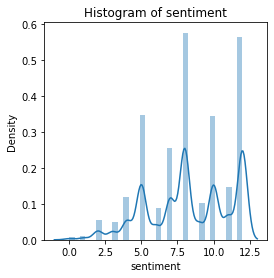

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1, figsize=(16,4))
n = 0 
for i in ['sentiment']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[i] , bins = 32)
    plt.title(f'Histogram of {i}')
plt.show()

In [20]:
# Assignment Stage
from sklearn.cluster import KMeans

X1 = df.loc[:, ['sentiment', 'content']].values
inertia = []
for n in range(1 , 11):
    model = KMeans(n_clusters = n,
               init='k-means++',
               max_iter=500,
               random_state=42)
    model.fit(X1)
    inertia.append(model.inertia_)

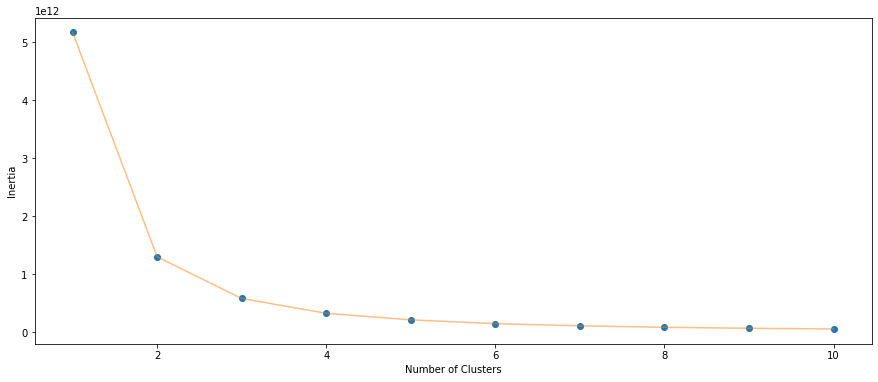

In [21]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

<h2>LABELING</h2>

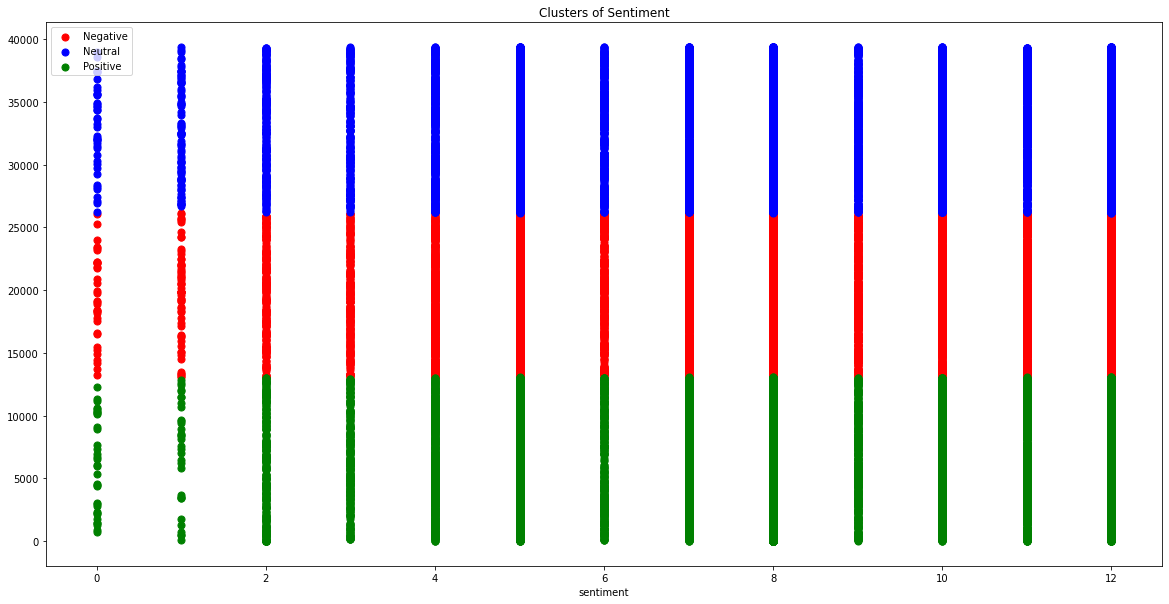

In [22]:
from sklearn.preprocessing import StandardScaler

model = KMeans(n_clusters = 3,
            init='k-means++',
            max_iter=500,
            random_state=42)
model.fit(X1)
labels = model.labels_
centroids = model.cluster_centers_
y_kmeans = model.fit_predict(X1) 

plt.figure(figsize=(20,10))
plt.scatter(X1[y_kmeans == 0, 0], X1[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Negative')
plt.scatter(X1[y_kmeans == 1, 0], X1[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Neutral')
plt.scatter(X1[y_kmeans == 2, 0], X1[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Positive')
plt.title('Clusters of Sentiment')
plt.xlabel('sentiment')
plt.legend()
plt.show()

In [23]:
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)

In [24]:
df_scaled = pd.DataFrame(df_scaled, columns=['tweet_id','sentiment','content'])

<h2>CLASSIFICATION</h2>

In [25]:
X = df.iloc[:,2:3]
y = df["sentiment"]

X

,content
0,7867
1,30407
2,22194
3,37607
4,16037
...,...
39995,0
39996,23855
39997,23781
39998,15935


In [44]:
X.head()

,content
0,7867
1,30407
2,22194
3,37607
4,16037


In [45]:
y.head()

0    1
1    0
2    0
Name: tweet_id, dtype: int64

In [26]:
# INSPEKSI DATA

# Cek Jumlah Data Per Kelas
print(df['tweet_id'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())

20000    1
6670     1
6663     1
6664     1
6665     1
        ..
33333    1
33334    1
33335    1
33336    1
19999    1
Name: tweet_id, Length: 40000, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_id   40000 non-null  int64
 1   sentiment  40000 non-null  int64
 2   content    40000 non-null  int64
dtypes: int64(3)
memory usage: 937.6 KB
None


          tweet_id     sentiment       content
count  40000.00000  40000.000000  40000.000000
mean   19999.50000      8.303600  19621.948625
std    11547.14972      2.839556  11362.554677
min        0.00000      0.000000      0.000000
25%     9999.75000      6.000000   9804.750000
50%    19999.50000      8.000000  19608.500000
75%    29999.25000     11.000000  29426.250000
max    39999.00000     12.000000  39387.000000


In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(y)

y

array([ 2, 10, 10, ...,  7,  5,  7])

In [28]:
# APPLYING TF-IdfVectorizer

from urllib import response
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
response = vectorizer.fit_transform(df)

print(response)

  (0, 2)	1.0
  (1, 1)	1.0
  (2, 0)	1.0


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
 
cv = CountVectorizer()
X_train_bow = cv.fit_transform(df).toarray()
X_test_bow = cv.transform(df).toarray()

In [30]:
X_train_bow.shape

(3, 3)

In [31]:
vectorizer.get_feature_names_out()

array(['content', 'sentiment', 'tweet_id'], dtype=object)

In [32]:
import pandas as pd

data = pd.DataFrame(
      response.todense(),
      columns = vectorizer.get_feature_names_out()
)

data.transpose()

,0,1,2
content,0.0,0.0,1.0
sentiment,0.0,1.0,0.0
tweet_id,1.0,0.0,0.0


In [46]:
response.todense()

matrix([[0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.]])

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = data.apply(LabelEncoder().fit_transform)
data.head()

,content,sentiment,tweet_id
0,0,0,1
1,0,1,0
2,1,0,0


In [34]:
x = data.drop(['tweet_id'], axis = 1)
y = data['tweet_id']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state=12)

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 5, random_state = 0)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [36]:
y_pred = dt.fit(x_train, y_train).predict(x_test)
print(dt)

DecisionTreeClassifier(max_depth=5, random_state=0)


<h2>PREDICT</h2>

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         0

    accuracy                           0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2



/home/aldi/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aldi/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aldi/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## EVALUASI

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1, 0],
       [1, 0]])

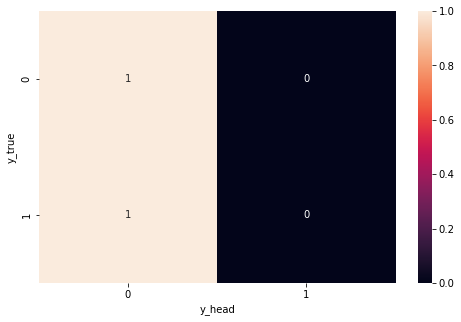

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [40]:
dt.score(x_train, y_train)

1.0

In [41]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

In [42]:
print("Metrics Acc : {:.2f}".format(acc))

Metrics Acc : 0.50


<AxesSubplot:>

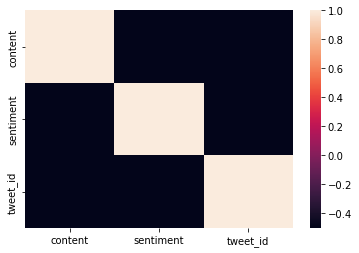

In [43]:
data.shape

corr = data.corr()

sns.heatmap(corr)